In [3]:
# 대표적인 비지도(Unsupervised) 학습 방법인 Autoencoder 를 구현
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [2]:
#######
# 옵션 설정
#######
learning_rate = 0.01
training_epoch = 20
batch_size=100
# 신경망 레이어 구성 옵션
n_hidden = 256 # 히든 레이어 뉴런 개수
n_input = 28*28 # 입력값 크기(이미지 픽셀수)

In [4]:
#######
# 신경망 모델 구성
#######
# Y가 없음. 입력값을 Y로 사용
X = tf.placeholder(tf.float32, [None, n_input])

# 인코더 레이어와 디코더 레이어의 가중치와 편향 변수 설정
# 다음과 같이 이어지는 레이어를 구성하기 위한 값들
# input -> encode -> decode -> output
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
# sigmoid 함수를 이용해 신경망 레이어를 구성
# sigmoid(X*W+b)
# 인코더 레이어 구성
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

# encode의 아웃풋 크기를 입력값보다 작은 크기로 만들어 정보를 압축하여 특성을 뽑아내고,
# decode의 출력을 입력값과 동일한 크기를 갖도록 하여 입력과 똑같은 아웃풋을 만들어 내도록 합니다.
# 히든 레이어의 구성과 특성치를 뽑아내는 알고리즘을 변경하여 다양한 오토인코더를 만들 수 있음
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

# 디코더 레이어 구성
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

# 디코더는 인풋과 최대한 같은 결과를 내야 하므로, 디코딩한 결과를 평가하기 위해 입력값인 X 값은
# 평가를 위한 실측 결과 값으로 하여 decoder 와의 차이를 손실값으로 설정.
cost = tf.reduce_mean(tf.pow(X-decoder,2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [5]:
#######
# 신경망 모델 학습
#######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        
        total_cost += cost_val
    print('Epoch : ', '%04d' %(epoch +1), 'Avg cost = ', '{:.4f}'.format(total_cost / total_batch))

print('최적화 완료')

Epoch :  0001 Avg cost =  0.2051
Epoch :  0002 Avg cost =  0.0615
Epoch :  0003 Avg cost =  0.0479
Epoch :  0004 Avg cost =  0.0432
Epoch :  0005 Avg cost =  0.0410
Epoch :  0006 Avg cost =  0.0391
Epoch :  0007 Avg cost =  0.0365
Epoch :  0008 Avg cost =  0.0339
Epoch :  0009 Avg cost =  0.0328
Epoch :  0010 Avg cost =  0.0316
Epoch :  0011 Avg cost =  0.0306
Epoch :  0012 Avg cost =  0.0298
Epoch :  0013 Avg cost =  0.0292
Epoch :  0014 Avg cost =  0.0277
Epoch :  0015 Avg cost =  0.0273
Epoch :  0016 Avg cost =  0.0269
Epoch :  0017 Avg cost =  0.0267
Epoch :  0018 Avg cost =  0.0264
Epoch :  0019 Avg cost =  0.0261
Epoch :  0020 Avg cost =  0.0259
최적화 완료


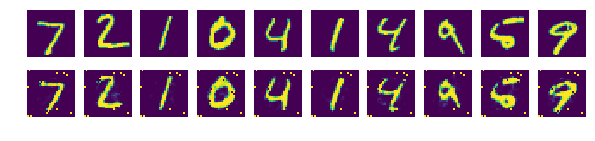

In [6]:
#######
# 결과 확인
# 입력값(위쪽)과 모델이 생성한 값(아래쪽)을 시각적으로 비교
#######
sample_size = 10

samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    ax[1][i].imshow(np.reshape(samples[i], (28,28)))
    
plt.show()